# **A Brief History of Neural Networks**

Recommended [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for presenting this notebook:
````
jt -t grade3 -cellw=90% -fs=20 -tfs=20 -ofs=20
````

First, a few fun discussion questions. 

---

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

# If you could make an atom-for-atom copy of a brain, would it **think**?

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

---

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

# If you could make an neuron-for-neuron copy of a brain...would it **think**?

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

---

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

# Is it possible to model the way our brains work using **mathematics**?

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

---

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

# Do you think an algorithm will ever be **conscious** in the way a human is?

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

---

- These are all fun questions to ponder over a few beers, but are another thing entirely to address with scientific rigor. 
- In the 1940s, Warren McCulloch and Walter Pitts, inspired by Russel and Whitehead's Pricipia Mathematica, published [A LOGICAL CALCULUS OF THE IDEAS IMMANENT IN NERVOUS ACTIVITY](http://www.cs.cmu.edu/~./epxing/Class/10715/reading/McCulloch.and.Pitts.pdf) - an effort to model the brain in terms of collections of simple mathematics models of neurons. 

![](../graphics/mcculloch_and_pitts-01.png)

- "Pitts and Mculloch were able to draw striking parallels between the computing powers of both artificial neural networks and Turing machines." [Reference 1] This later turned out not to be entirely true - see reference for more details.
- Lets look at the mathematical model of the nueron introduced by McCulloch and Pitts:

![](../graphics/spacer_small.png)

$$
f(\mathbf{x}) = \begin{cases}1 & \text{if }\ \mathbf{w} \cdot \mathbf{x} + b > 0\\0 & \text{otherwise}\end{cases}
$$



![](../graphics/spacer_small.png)

where $\mathbf{w}$ is a vector of real-valued weights, $\mathbf{w} \cdot \mathbf{x}$ is the dot product $\sum_{i=1}^m w_i x_i$, where $m$ is the number of inputs and $b$ is the ''bias''.

![](../graphics/spacer_small.png)

![](../graphics/NNQ1-01.png)

---

![](../graphics/mcculloch_pitts_nueron-01.png)

- Here's a common way to represent Mculloch-Pitts Nueron Models. 
- It's worth spending some time making sure we understand how these guys work, becuase remarkably, cutting-edge neural networks today use **very similar** models of neurons.

---

- Maybe we'll do these in desk clumps and put answers on the whiteboards:

![](../graphics/NNQ2-01.png)

---

![](../graphics/NNQ3-01.png)

---

- So, McCulloch and Pitts showed that sets of these nueron models connected in various ways could perform various complex operations.
- They did not, however, posit an explanation for **how brains learn.**
- Six years after McCulloch and Pitts published [A LOGICAL CALCULUS OF THE IDEAS IMMANENT IN NERVOUS ACTIVITY](http://www.cs.cmu.edu/~./epxing/Class/10715/reading/McCulloch.and.Pitts.pdf), Donold O. Hebb suggested how these models could learn. [Ref 1 and 3]
- Hebb proposed that the weights of connections between our neurons change as we learn - specifically that the conductivity of brain synapses changed [over time as it was activated by other neurons](https://en.wikipedia.org/wiki/Hebbian_theory). 

![](../graphics/spacer_small.png)

---

![](../graphics/rosenblatt-01.png)

- In the mid 1950s at Cornell's Aeronautical Labratory, Frank Rosenblatt, developed an algorithmic approach to training McCulloch+Pitts style networks. 
- He first implemented his algorithm on an IBM 704 computer, and then built a physical machine, **The Perceptron**, to implement his algorithm.
- Let's see how Rosenblatt's algorithm works.

### **The Perceptron Algorithm**

Let's consider the 2 dimensional case, here's some data for us to play with. This example is borrowed from Leslie Valliant's outstanding book, **Probably Approximately Correct**, pages 44-49.

In [1]:
%pylab inline

#Training Data
X = np.array([[4, 1],
              [1, 2],
              [5, 1],
              [3, 2],
              [5, 2],
              [4, 3]])

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Labels
y = np.array([1, 0, 1, 0, 1, 0])

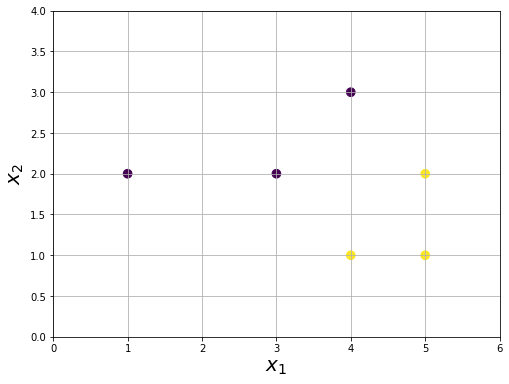

In [3]:
fig = figure(0, (8,6))
scatter(X[:,0], X[:,1], c = y, s = 75)
xlabel('$x_1$', fontsize = 20)
ylabel('$x_2$', fontsize = 20)
xlim([0, 6]); ylim([0, 4])
grid(1)

Now, let's see how Frank Rosenblatt's perceptron machine would learn to classify this data. Remember that our neuron model from McCulloch + Pitts: 



![](../graphics/spacer_small.png)

$$
f(\mathbf{x}) = \begin{cases}1 & \text{if }\ \mathbf{w} \cdot \mathbf{x} + b > 0\\0 & \text{otherwise}\end{cases}
$$

In our 2 dimensional case this would be:

![](../graphics/spacer_small.png)

$$
f(x_1, x_2) = \begin{cases}1 & \text{if }\ w_1 x_1 + w_2 x_2 + b > 0\\0 & \text{otherwise}\end{cases}
$$

![](../graphics/spacer_small.png)

- So our goal here then is for $w_1 x_1 + w_2 x_2 + b > 0$ for our positive examples, and $w_1 x_1 + w_2 x_2 + b < 0$ for our negative examples. 
- First, let's make a bit of a variable change. 
- It will be easier to get Rosenblatt's equation working if $b=0$. 
- We can achieve this, without losing any generality, by swapping our 2d problem for a 3d problem, where we append a 1 to each of our examples, like this:

In [4]:
#Careful, just run this once!
X = np.hstack((X, np.ones((X.shape[0], 1))))

In [5]:
X

array([[4., 1., 1.],
       [1., 2., 1.],
       [5., 1., 1.],
       [3., 2., 1.],
       [5., 2., 1.],
       [4., 3., 1.]])

- So, we've appended a 1 to each of our examples, and are now going to try to solve this (equivalent) equation instead:

![](../graphics/spacer_small.png)

$$
f(x_1, x_2) = \begin{cases}1 & \text{if }\ w_1 x_1 + w_2 x_2 + w_3 x_3 > 0\\0 & \text{otherwise}\end{cases}
$$

![](../graphics/spacer_small.png)

- Where $b = w_3$.
- Can you see *why* this equation is equivalent to our original 2-d case?
- From here, the perceptron algorithm is simple! 
- First, let's write a quick method to wrap up our neuron model:



In [6]:
def neuron(x, w):
    '''Simple McCulloch-Pitts Neuron model, x and w and are numpy arrays of the same shape'''
    return np.dot(x, w) > 0

- Next, we'll initialize our model with weights of zero:

In [7]:
w = np.zeros(3)

In [8]:
w

array([0., 0., 0.])

- Then we'll iterate through our examples one at a time:

In [9]:
i = 0
X[i, :]

array([4., 1., 1.])

- For each example, check if our classification is correct:

In [10]:
y[i]

1

In [11]:
neuron(X[i, :], w)

False

- In this case, our classification was incorrect. The idea behind the perceptron algorithm is to update our weights to make our nueron more likely to correctly classify our example next time. The output of $w_1 x_1 + w_2 x_2 + w_3 x_3$ was too small in this case. The Perceptron algorithm tells us to increase the weights by adding the our example values to our weights, like this:

In [12]:
w = w + X[i, :]

In [13]:
w

array([4., 1., 1.])

- Let's move on to our next example: 

In [14]:
i = 1
X[i, :]

array([1., 2., 1.])

In [15]:
y[i]

0

In [16]:
neuron(X[i, :], w)

True

**Wrong again!** But this time $w_1 x_1 + w_2 x_2 + w_3 x_3$ was too large! As you may have guessed, we need to update our weights by subtracting our example values. 

In [17]:
w = w - X[i, :]

In [18]:
w

array([ 3., -1.,  0.])

Let's check out one more example:

In [19]:
i = 2
X[i, :]

array([5., 1., 1.])

In [20]:
y[i]

1

In [21]:
neuron(X[i, :], w)

True

- This one worked! When our neuron is correct, the perceptron algorithm tells us to to leave our weights alone.
- Alright, let's put this all together into the perceptron algorithm!
- It would be cool to visualize our performance as we go, so let's write a few functions to help:

In [22]:
def update_nueron(w, x, label):
    '''
    Update McCulloch + Pitts Nueron using Rosenblatt's Perceptron Algorithms
    w = neuron weights
    x = (n dimensional numpy array example)
    label = binary label
    '''
    if neuron(x, w) == 0 and label == 1:
        w = w + x
        print('incorrect!, New weights = ' + str(w))

    elif neuron(x, w) == 1 and label == 0:
        w = w - x
        print('incorrect!, New weights = ' + str(w))

    else:
        print('correct!')  
    
    return w

- It will be **even cooler** if we can visualize our decision boundary as the algorithm advances.

In [23]:
def plot_decision_boundary(X, y, w, i):
    x1s = np.arange(7)
    x2s = (-w[2]-w[0]*x1s)/w[1]

    fig = figure(0, (8,6))
    #Scatter data
    scatter(X[:,0], X[:,1], c = y, s = 75)
    scatter(X[i,0], X[i,1], c = 'r', s = 75)
    #Plot decision boundary
    plot(x1s, x2s)

    xlabel('$x_1$', fontsize = 20)
    ylabel('$x_2$', fontsize = 20)
    grid(1)

In [24]:
#Initialize Weights to zero:
w = np.zeros(3)

#Start on 0th example:
i = 0

correct!


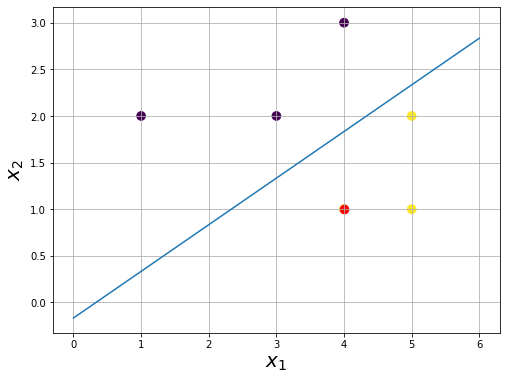

In [43]:
#Run this cell multiple times to iterate through perceptron algorithm.
w = update_nueron(w, X[i, :], y[i])

#plot decision boundary and examples
plot_decision_boundary(X, y, w, i)

#Increment counter, startover when we reach the end of examples
i = (i+1)%X.shape[0] 

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

- If we run our algorithm long enough...something pretty cool happens!
- Eventually, it arrives at a set of weights that get all of our example right!
- So, in this example, our perceptron algorithm **learned** a set of weights for our McCulloch + Pitts nueron that correctly classified all our examples! Here they are:

In [44]:
w

array([ 3., -6., -1.])

In summary, here's what we did:

| True Value |   Example    | Classification by <br> Previous Hypothesis | Hypothesis After Updating| 
|:-------:|:-------:|:-------:|:-----------:|
| - |    -      | - | $0x_1+0x_2+0x_3>0$|
| 1 | [4, 1, 1] | 0 | $4x_1+1x_2+1x_3>0$|
| 0 | [1, 2, 1] | 1 | $3x_1-1x_2+0x_3>0$|
| 1 | [5, 1, 1] | 1 | $3x_1-1x_2-0x_3>0$|
| 0 | [3, 2, 1] | 1 | $0x_1-3x_2+1x_3>0$|
| 1 | [5, 2, 1] | 0 | $5x_1-1x_2-0x_3>0$|
| 0 | [4, 3, 1] | 1 | $1x_1-4x_2+1x_3>0$|
| 1 | [4, 1, 1] | 0 | $5x_1+3x_2+0x_3>0$|
| 0 | [1, 2, 1] | 0 | $5x_1+3x_2+0x_3>0$|
| 1 | [5, 1, 1] | 1 | $5x_1-3x_2+0x_3>0$|
| 0 | [3, 2, 1] | 1 | $2x_1-5x_2+1x_3>0$|
| 1 | [5, 2, 1] | 0 | $7x_1-3x_2-0x_3>0$|
| 0 | [4, 3, 1] | 1 | $3x_1-6x_2-1x_3>0$|
| 1 | [4, 1, 1] | 1 | $3x_1-6x_2-1x_3>0$|
| 0 | [1, 2, 1] | 0 | $3x_1-6x_2-1x_3>0$|
| 1 | [5, 1, 1] | 1 | $3x_1-6x_2-1x_3>0$|
| 0 | [3, 2, 1] | 1 | $3x_1-6x_2-1x_3>0$|
| 1 | [5, 2, 1] | 0 | $3x_1-6x_2-1x_3>0$|
| 0 | [4, 3, 1] | 1 | $3x_1-6x_2-1x_3>0$|

Now, that was a pretty easy example! What about these cases:

---

![](../graphics/NNQ4-01.png)

---

![](../graphics/spacer_small.png)

## Let's find out!

![](../graphics/perceptron_1.gif)

*"The interesting fact about the perceptron algorithm is that, in spite of our lack of control over its exact fate as we let it loose on arbitrary data, it nonetheless manages to acheive something quite remarkable. The most basic statement of the power of this algorithm, proved by Albert Novikoff soon after the algorithm was first proposed, is that if there is a true linear seperator, then the algrorithm is sure to find it, or another hypothesis that also correctly classifies all the examples, after having made misclassifications only a finite number of times."*
- Leslie Valliant in Probably Approximately Correct, p. 47

---

## If a linear seperator exists, Rosenblatt's Perceptron will find it!

- The [upper bound found by Albert Novikoff](https://cs.uwaterloo.ca/~y328yu/classics/novikoff.pdf) is $M/n^2$, where $M$ is the square of the distance of the furthest data point in the training set from the origin, and m is the margin. The margin is the minimum distance of any data point from the seperating line for which the line this distance is largest. 
- This is a remarkable result!
- Importantly, this is true for not just 2 dimensional data, but **data of any dimension!**
- *"Learning is achieved in many steps that are plausible but unnocuous when viewed one by one in isolation. These steps work becuase there is an overall algorithmic plan. In combination the steps achieve something, in particular, some kind of convergence."*
    - Leslie Valliant in Probably Approximately Correct, p. 49
- Rosenblatt's perceptron machine had an array of 400 photocells, (probably?) arranged in a 20x20 grid.
- Here's a figure from this [Principles of NeuroDynamics](http://www.dtic.mil/dtic/tr/fulltext/u2/256582.pdf):


![](../graphics/rosenblatts_perceptron.png)

---

## Let's try out Rosenblatt's Perceptron on some basic synthetic images!

![](../graphics/spacer_small.png)

![](../graphics/NNQ5-01.png)

___

## Let's try it!
- Let's make sure to think carefully about the **dimension of our problem** as we move to images.

In [45]:
sys.path.append('../util')
from synthetic import make_synthetic_ball, make_synthetic_brick, make_random_balls, make_random_bricks

In [46]:
width = 16
height = 8
shift_x = 2
shift_y = 6
im_shape = (20, 20)

brick = make_synthetic_brick(im_shape, width, height, shift_x, shift_y)

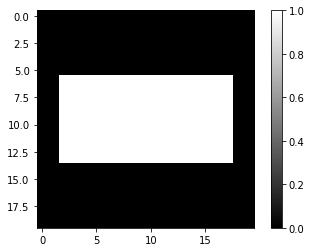

In [47]:
imshow(brick, cmap = 'gray')
colorbar()

In [48]:
center = (9.5, 9.5)
radius = 7

ball = make_synthetic_ball(im_shape, center, radius)

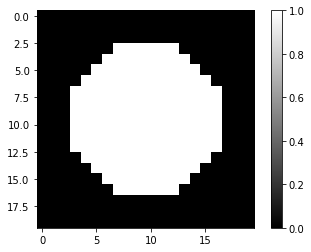

In [49]:
imshow(ball, cmap = 'gray')
colorbar()

In [50]:
X = np.vstack((brick.ravel(), ball.ravel()))
y = np.array([0, 1])

In [51]:
print(X.shape, y.shape)

(2, 400) (2,)


In [52]:
X = np.hstack((X, np.ones((X.shape[0], 1))))

#Initialize Weights to zero:
w = np.zeros(X.shape[1])

In [53]:
for i in range(25):
    w = update_nueron(w, X[i%X.shape[0], :], y[i%X.shape[0]])

correct!
incorrect!, New weights = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 

---

...Ok, let's up the ante.

![](../graphics/NNQ6-01.png)

---

In [54]:
num_examples = 9
im_shape = (20, 20)

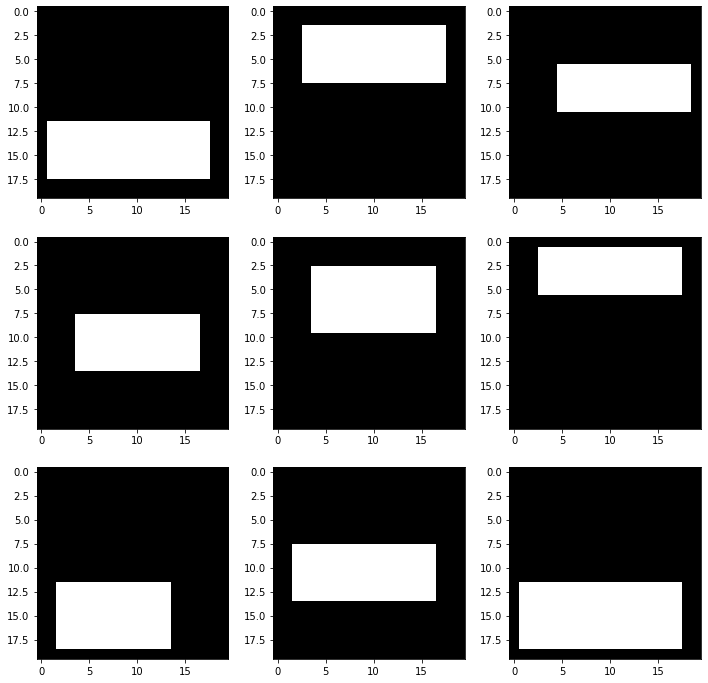

In [55]:
bricks = make_random_bricks(num_bricks=num_examples, im_shape = im_shape)

fig = figure(0, (12,12))
for i, brick in enumerate(bricks):
    if i < 9:
        fig.add_subplot(3, 3, i + 1)
        imshow(brick, cmap = 'gray')

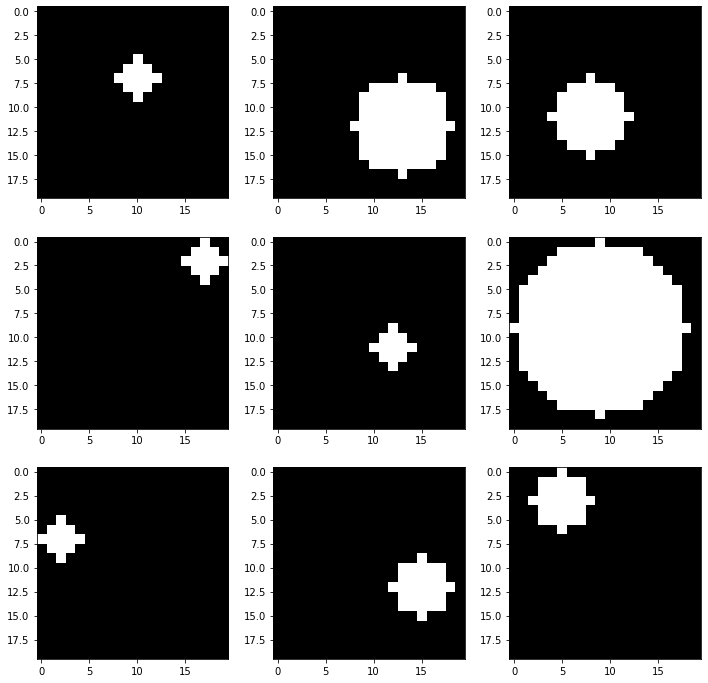

In [56]:
balls = make_random_balls(num_balls = num_examples, im_shape = im_shape)

fig = figure(0, (12,12))
for i, ball in enumerate(balls):
    if i < 9:
        fig.add_subplot(3, 3, i + 1)
        imshow(ball, cmap = 'gray')

In [57]:
X = np.array(bricks).reshape(-1, im_shape[0]*im_shape[1])
X = np.vstack((X, np.array(balls).reshape(-1, im_shape[0]*im_shape[1])))

y = np.zeros(X.shape[0])
y[len(bricks):] = 1.0

In [58]:
print(X.shape, y.shape)

(18, 400) (18,)


In [59]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [60]:
#Only run once!
X = np.hstack((X, np.ones((X.shape[0], 1))))

#Initialize Weights to zero:
w = np.zeros(X.shape[1])

In [61]:
for i in range(250):
    w = update_nueron(w, X[i%X.shape[0], :], y[i%X.shape[0]])

correct!
correct!
correct!
correct!
correct!
correct!
correct!
correct!
correct!
incorrect!, New weights = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0

  0.  0.  0.  0.  1.]
correct!
correct!
incorrect!, New weights = [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  3.
  0.  0.  0.  0.  0.  0.  0.  4.  4.  4.  3.  3.  3.  3.  3.  3. -1. -1.
  2.  2.  3.  0.  0.  0.  0. -3.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.
  0. -1. -1. -1.  3.  3.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.
  0.  0.  0.  0. -1. -1.  3.  0.  0.  0.  4.  1.  1.  1.  1.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  4.  4.  1.  1.  1.  1.  1.
  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  4.  1.  1. -1.
 -2. -2. -2.  1.  1.  1. -2. -2. -2. -2. -2. -2. -3.  0.  0.  4.  4.  1.
  1. -2. -2. -2.  4.  1.  1.  1.  1.  0. -2. -2. -2. -2. -3.  0.  0.  4.
  4.  4.  0. -3.  0.  0.  0.  3.  5.  2. -1. -1. -1. -1. -1.  1. -3.  0.
  4.  4.  4.  4.  0.  0.  0.  0.  0.  2.  5.  2.  0. -1. -1. -1. -1.  3.
  1.  0.  0.  4.  4.  4.  0.  0.  0.  0.  0.  2.  2.  3.  0.  0. -1. -1.
 -1.  3. -3.  0.  0.  4.  4.  4.  3.  3.  3.  3.  3.  5.  

---

Alright, now the big one...

![](../graphics/NNQ7-01.png)

---

## Step 0

- Alright, let's break this one down a bit.
- We'll go one iteration at a time, and watch how our weights update as perceptron algorithm "learns".
- We'll outline the example that we're currently "learning from", green means that the current output of our McCulloch and Pitts neuron matches our label, red means our output is incorrect.
- Notice that our weights don't change when our neuror is correct, why?
- What does the bottom right plot show? What is it's dimension?

![](../graphics/perceptron_step_1.png)

---

## Step 1

![](../graphics/perceptron_step_2.png)

---

## Step 2


![](../graphics/perceptron_step_3.png)

## Step 3

![](../graphics/perceptron_step_4.png)

## Step 4

![](../graphics/perceptron_step_5.png)

---

### Now let's check out the first 10 steps all together.

![](../graphics/spacer_small.png)

![](../graphics/perceptrons_5.gif)

- Now, the big question - if we let this run for more iterations **do you think it will be able to perfectly classify our data?**
- Ready to find out?

![](../graphics/spacer_small.png)

---

![](../graphics/spacer_small.png)

![](../graphics/perceptrons_4.gif)

# Rosenblatt's Perceptron Wins!

- Incredible, right?
- Now, a good follow up question would be **how does this do out of sample? Is it actually learning or just memorizing?**
- On a held out test set of 6 examples, across ten trials, Rosenblatt's perceptron acheived these accuracies: 4/6, 4/6, 4/6, 6/6, 6/6, 6/6, 5/6, 5/6, 5/6, 6/6. 
- Results are different becuase I'm randomizing the order we feed example into the algroithm. 
- This makes for an average out of sample accuracy of **85%**. Not bad!
- **Sidenote on VC Dimension** - The Perceptron has a VC-dimension of the dimension of the input data plus one, what this means of us is that the perceptron can find a hyperplane that perfectly divides *any set* of examples, as long as we have fewer examples than the dimension of the input data plus one. Here, we're using images of size 20 by 20, so the input dimension of our data is 400. So if we use less than 401 examples, our perceptron will be able to perfectly divide our bricks from balls, given enough iterations. Now, just becuase our perceptron finds a hyperplane that does divide our examples (for example we could easily do this with one example of each class), does not mean that it's really learned the concept of bricks vs balls - we can test this by testing our perceptron on images outside the training set. This is a big theme in machine learning that we'll spend a lot of time on in this course. For a great intro to VC dimension, check out [Learning From Data](https://work.caltech.edu/telecourse.html) from Caltec.

---

# And how did the world respond?

![](../graphics/perceptron_hype-01.png)

- In the press at least, things got a little silly. 
- This might remind you of some the AI hype we see today.
- Fun questions to chat about over a beer: 
    - Was Rosenblatt right or wrong about the cat vs dog thing? He could have meant "in theory", and modern deep learning networks, in many ways the decendants of the Perceptron, can do this pretty well!
    - Are we any closer to Artificial General Intelligence than we were in 1958?
    - Does the general public have a better grasp on AI than in the 1950s?
    - Are exaggerated reports like this good or bad for the field? 

---

- A few years later it became apparent that the Perceptron did have limitations. For example, it could differentiate between typed alphabetical letters, but error rate increased by 21% when the font changed. [Reference 1, p 103].
- However Rosenblatt's work did kick of lots of interesting work in the 1960s in neural netowrks including Wilfrid K. Taylor's "Taylor Net", Bernard Widrow and M. E. Hoff's Adeline and Madeline, and Karl Steinbuch's learning matrix. [Reference 1, p 105].
- And then, in 1969, Marvin Minsky and Seymour Papert published a book entitled Perceptrons:

![](../graphics/perceptrons_book-01.png)

- Minsky and Papert showed using analytical techniques some of the strenghts and many of limitations of perceptrons. 
- "...However, [in 1966] we were now involved in establishing at M.I.T. an artificial intelligence labratory largely devoted to real "seeing machines," and gave no attention to perceptrons until we were jolted by attending an I.E.E.E. Workshop on Patter Recognition in Peurto Rico early in 1967. Appalled at the persistent influence of perceptrons (and similar ways of thinking) on *practical pattern recognition*, we determined to set out our work as a book. Slightly ironically, the first results obtained in our new phase of interest were the psuedo-positive applications of stratification." - Perceptrons, page 242
- Here's a few simple examples in 2d where perceptrons fail:

![](../graphics/perceptrons_3.gif)

- Misky and Papert cover lots more complex examples than the simple ones above. 
- Does anyone recoginize the form of the first exmaple above?

---

## "Such was the authority of Minsky and Papert at that time that the book brought neural-network reserach in the United States to a virtual halt." [Reference 1, p 106]


Minsky refutes this: 

"One popular version is that the publication of our book so discouraged reserach on learning in network machines that a promising line of research was interupted. Our version is that progress had already come to a virual halt becuase of the lack of adequate basic theories, and the lessons of this book provided the field with new momentum - albeit, paradoxically, by redirecting it's immediate concerns. To understand the situation, one must recall that by the mid 1960s there had been a great many experiments with perceptrons, but no one had been able to explain why they were able to learn to recognize certain kinds of patterns, but not others." - Marvin Minsky, 1988 reprint of "Perceptrons", p xii

![](../graphics/spacer_small.png)

# **Did "Perceptrons" Kill Neural Network Reseach for 15 years?**

![](../graphics/spacer_small.png)

- I'll let you be the final judge of that. A few thoughts I have briefly: 

1. After reading bits of Perceptrons, I don't think Minsky and Papert were trying to malicious. As we just saw, the field really did need some "hype busting".
2. It does appear that neural network research did slow down in the 1970s, however it's hard to say how much this was a result of the book. 

---

## **The 1980s**

- One limitation of Rosenblatt's Perceptron learning algorithm was that **it only worked for networks that were one neuron deep.**
- In 1986, Rumelhard, Hinton, and Williams showed in a Nature Letter, showed a method, backpropogation, that could be used to train multi layer neural networks. 
- The idea was not necessary unique to or invented by Rumelhard, Hinton, and Williams, but their work and this publication kicked off new reserach into neural networks. 

![](../graphics/rumerlhart_hinton-01.png)

- Backpropgation of errrors remains a critical technique today, we'll cover backpropogation in detail in this module. 

## **The 2010s**

![](../graphics/hinton_krizhevinsky-01.png)

- And in our final module we'll dive into deep learning, which is overall remarkably similiar to Hinton's work in the 1980s. 

### References

1. Crevier, Daniel. AI: the tumultuous history of the search for artificial intelligence. Basic Books, 1993. pages 30-32, 102-107.
2. [The Man Who Tried to Redeem the World with Logic](http://nautil.us/issue/21/information/the-man-who-tried-to-redeem-the-world-with-logic). Nautilus.
3. Hebb, Donald Olding. "The first stage of perception: growth of the assembly." The Organization of Behavior. Psychology Press, 2005. 102-120.